# Discussion 10: Nonlinear Conjugate Gradient Methods

In this discussion, we will explore
* Nonlinear conjugate gradient methods

---

## Linear Conjugate Gradient Method

Last time we described the **conjugate gradient method** for solving a system of linear equations $Q\mathbf{x}=\mathbf{b}$, which can be interpreted as minimizing a quadratic function, $f(\mathbf{x}) = \frac{1}{2}\mathbf{x}^TQ\mathbf{x} - \mathbf{b}^T\mathbf{x}$. Recall that the conjugate gradient method seeks to mimic the property of Quasi-Newton methods where each new step is $Q$-conjugate to all previous steps, leading to convergence in $n$ steps if $\mathbf{x}\in\mathbb{R}^n$. It does so in the following way:

1. Set $\mathbf{p}_0 = -\nabla f_0$, as in steepest descent.
2. Determine $\alpha_k$ and update $\mathbf{x}_{k+1} = \mathbf{x}_k + \alpha_k\mathbf{p}_k$.
3. Set $\mathbf{p}_{k+1} = -\nabla f_{k+1} + \beta_k\mathbf{p}_k$, where $\beta_k$ is chosen so that $\mathbf{p}_{k+1}$ and $\mathbf{p}_k$ are conjugate in some sense.
4. Repeat 2-3 until convergence.

If $f$ is quadratic, we showed the optimal values for the parameters $\alpha_k$ and $\beta_k$ were given by

$$ \alpha_k = -\frac{\mathbf{p}_k^T\nabla f_k}{\mathbf{p}_k^TQ\mathbf{p}_k},\qquad \beta_k = \frac{\mathbf{p}_k^TQ\nabla f_{k+1}}{\mathbf{p}_k^TQ\mathbf{p}_k} $$

and, after some efficiency considerations, we outlined an efficient version of the linear conjugate gradient method:

1. Set $\mathbf{r}_0= Q\mathbf{x}_0-\mathbf{b}$ (often called the [residual](https://en.wikipedia.org/wiki/Residual_(numerical_analysis))), $\mathbf{p}_0 = -\mathbf{r}_0$.
2. Calculate and store $\mathbf{y}_k=Q\mathbf{p}_k$.
3. Set $\alpha_k = \dfrac{\mathbf{r}_k^T\mathbf{r}_k}{\mathbf{p}_k^T\mathbf{y}_k}$ and update $\mathbf{x}_{k+1} = \mathbf{x}_k + \alpha_k\mathbf{p}_k$.
4. Update $\mathbf{r}_{k+1} = \mathbf{r}_k + \alpha_k\mathbf{y}_k$.
5. Set $\beta_k =\dfrac{\mathbf{r}_{k+1}^T\mathbf{r}_{k+1}}{\mathbf{r}_k^T\mathbf{r}_k}$ and update $\mathbf{p}_{k+1} = -\mathbf{r}_{k+1} + \beta_k\mathbf{p}_k$.
6. Repeat 2-5 until convergence.

This algorithm was shown to indeed converge in at most $n$ steps.

## Nonlinear conjugate gradient methods

### What if the objective function isn't quadratic?

Then most of the argument breaks down: $\alpha_k$ and $\beta_k$ depend on $A$, which don't exist for non-quadratic functions.

But $Q$ is just the Hessian matrix for a quadratic function, so for non-quadratic functions we can make some substitutions.

* **Step Size**: $\alpha_k$ is just the step size, it's not crucial to the $Q$-conjugacy of CG method, so just replace it with another step size selection algorithm: exact line search, backtracking, etc. This will **delay convergence** since the steps will be suboptimal, but won't have a major impact on convergence rates.

* **Gradient update**: Look at step 4. Update $\mathbf{r}_{k+1} = \mathbf{r}_k + \alpha_k\mathbf{y}_k$.

  * We can't use this recursive formula, but you can just calculate $\nabla f_{k+1}$ directly.

* **Beta**: It's not straightforward to generalize $\beta_k$, which generates the $Q$-conjugacy of step directions for quadratic functions. This is where the nonlinear conjugate gradient methods differ: Each nonlinear conjugate gradient method has a different calculation for the coefficient $\beta_k$.


### Hestenes-Stiefel (HS) Formula

In the formula for $\beta_k$, $Q$ only shows up attached to $\mathbf{p}_k$, so we only need to find a substitute for the  vector $Qp_k$.

Hestenes and Stiefel proposed a simple substitution based on the form of the recursive update of the gradient, $\nabla f_{k+1} = \nabla f_k + \alpha_kQ\mathbf{p}_k$, from the linear CG method. Though this does not hold for a general non-quadratic function, replacing $Q$ with the Hessian matrix reveals that this can be treated as an approximation to the updated gradient. Rearranging this update equation yields

$$ Q\mathbf{p}_k = \frac{\nabla f_{k+1} - \nabla f_k}{\alpha_k} $$

and thus we set

$$ \beta_k = \frac{(\nabla f_{k+1} - \nabla f_k)^T\nabla f_{k+1}}{\mathbf{p}_k^T(\nabla f_{k+1} - \nabla f_k)} $$

noting that the factor of $\frac{1}{\alpha_k}$ cancels out. One immediately recognized drawback of this substitution is the subtraction in the denominator, which may vanish if the gradient is equal or very close to it in consecutive steps.

#### Basic idea: 

Non-quadratic Hessians won't have $Q$ as the Hessian, so replace $Q \mathbf{p}_k$ with an approximation.

#### Cons:
* **Denominator may be close to zero**: Denominator may vanish if gradient is equal or very close to it in consecutive steps.

### Polak-Ribière (PR) Formula

HS formula only relies on the fact that $Q\mathbf{p}_k = \frac{\nabla f_{k+1} - \nabla f_k}{\alpha_k} $. 

PR formula relies also on the fact that the new gradient $\nabla f_{k+1}$ is orthogonal to all previous search directions $\mathbf{p}_j$, $j \le k$. This was only true for quadratic functions, but since we're already approximating, we may as well continue the approximation. Expanding the denominator, then, leads to the first term vanishing. Furthermore, since $\mathbf{p}_k = -\nabla f_k + \beta_{k-1}\mathbf{p}_{k-1}$, we get further cancellation. That is,

$$ \mathbf{p}_k^T(\nabla f_{k+1} - \nabla f_k) = -\mathbf{p}_k^T\nabla f_k = -(-\nabla f_k + \beta_{k-1}\mathbf{p}_{k-1})^T\nabla f_k = \nabla f_k^T\nabla f_k $$

and thus the PR formula for $\beta_k$ is given by

$$ \beta_k = \frac{(\nabla f_{k+1} - \nabla f_k)^T\nabla f_{k+1}}{\nabla f_k^T\nabla f_k} $$


### Fletcher-Reeves (FR) Formula

Fletcher and Reeves further proposed to continue the approximation by simply using the final form of $\beta_k$ in the efficient implementation of the linear CG method,

$$ \beta_k = \frac{\nabla f_{k+1}^T\nabla f_{k+1}}{\nabla f_k^T\nabla f_k} $$

### Comparisons

#### In the case of suboptimal line search
Despite the vanishing denominator issue with the HS formula, since it involves the fewest approximations, it is actually the closest to "correct", in the sense that if the step size selection algorithm for $\alpha_k$ is suboptimal (e.g. backtracking), experimental results show that HS typically performs better than FR or PR.

#### Descent directions and FR/PR
Indeed even if $\alpha_k$ is chosen so that it satisfies *both* Wolfe conditions, the FR formula does not guarantee that $\mathbf{p}_{k+1}$ is a descent direction. This is true since

$$ \nabla f_{k+1}^T\mathbf{p}_{k+1} = -\nabla f_{k+1}^T\nabla f_{k+1} + \beta_k\nabla f_{k+1}^T\mathbf{p}_k $$

and the dot product in the second term may be negative, even if $\mathbf{p}_k$ was a descent direction at $\mathbf{x}_k$.

#### If Strong Wolfe conditions are satisfied, FR formula can be shown to be a descent direction.

**Wolfe Conditions**:

* Wolfe I (Armijo condition): $\qquad f_{k+1}\le f_k+c_1\alpha_k\mathbf{p}_k^T\nabla f_k$
* Wolfe II (curvature condition): $\quad \mathbf{p}_k^T\nabla f_{k+1}\ge c_2\mathbf{p}_k^T\nabla f_k$

with $0 < c_1 < c_2 < 1$.

**Strong Wolfe Conditions**: 
$$f_{k+1}\le f_k+c_1\alpha_k\mathbf{p}_k^T\nabla f_k$$
$$ |\mathbf{p}_k^T\nabla f_{k+1}| \le - c_2 \mathbf{p}_k^T\nabla f_k$$

with $0 < c_1 < c_2 < 1/2$.

If, however, $\alpha_k$ is chosen to satisfy the *strong* Wolfe conditions, a modification to Wolfe II which requires the *absolute value* of the gradient at the new point is less steep than the old point (see diagram), the FR formula can be shown to be a descent direction. The PR formula, however, fares even worse, not even guaranteeing descent when the strong Wolfe conditions are satisfied. However, a slight modification to PR, called PR+, does guarantee descent, setting

$$ \beta_k^+ = \max\{0,\beta_k^{PR}\} $$

i.e. only accepting PR's $\beta_k$ if it is positive, otherwise setting $\beta_k=0$. Note that if $\beta_k=0$, $\mathbf{p}_{k+1}=-\nabla f_k$, equivalent to steepest descent, so this essentially "resets" CG at the current iteration.

<img src="https://d3i71xaburhd42.cloudfront.net/6d5eb4e2e15787f0e074e78d4e4705527e6d3a13/27-Figure2.3-1.png" width=75% /> p \le 

**Wolfe Condition II** says: The slope at your $\alpha$ must be larger than this value (less steep).

**Strong Wolfe II** says: The absolute value of your slope must be less than this value (absolute value of the slope is less steep).


### Restarts
Regardless of which formula is chosen for $\beta_k$, something all nonlinear CG methods have in common is that the "$Q$-conjugacy" of the search directions tends to deteriorate as the number of iterations grows large, leading to gradually decaying performance if left unmitigated. This is expected since the Hessian is not a constant matrix for non-quadratic functions, so requiring conjugacy at one step does not guarantee conjugacy for all previous steps. For this reason, most implementations of CG on non-quadratic functions involve "restarting" (i.e. setting $\beta_k=0$) after a fixed number of iterations, typically $n$ or $n+1$. The rationale here is that if a function is approximately quadratic near its minimizer (most are), eventually the iteration will enter the quadratic region, at which point, restarting CG would be expected to lead to convergence in a finite number of steps.

### In the case of a Bad Direction

FR-formula

$$ \beta_k = \frac{\nabla f_{k+1}^T\nabla f_{k+1}}{\nabla f_k^T\nabla f_k} $$


#### With a small step size, ending up with a bad direction $p_k$ means FR will continue to generate bad directions

If FR is implemented with $\alpha$ that satisfies the Strong Wolfe conditions with $0 < c_1 < c_2 < 1/2$, then the method generates directions $p_k$ that satisfy the following inequalities:

$$-\frac{1}{1-c_2} \le \frac{\nabla f_k^T p_k}{\|\nabla f_k\|^2} \le \frac{2c_2 - 1}{1 - c_2}$$

Let $\theta_k$ b the angle between $p_k$ and the steepest descent direction $-\nabla f_k$: if this angle is 90 degrees, you're not improving your result.

$$\cos \theta_k = \frac{-\nabla f_k^T p_k}{\|\nabla f_k\|\|p_k\|}$$

Multiply both sides of the above inequality by $\|\nabla f_k\| / \|p_k\|$ to get
$$-\frac{\|\nabla f_k\|}{(1-c_2)\|p_k\|} \le \frac{\nabla f_k^T p_k}{\|\nabla f_k\|\|p_k\|} \le \frac{(2c_2 - 1) \|\nabla f_k\|}{(1 - c_2)\|p_k\|}$$
$$\frac{\|\nabla f_k\|}{(1-c_2)\|p_k\|} \ge \cos \theta \ge -\frac{(2c_2 - 1) \|\nabla f_k\|}{(1 - c_2)\|p_k\|}$$

So $\cos \theta \approx 0$ if and only if $\|\nabla f_k\| \ll \|p_k\|$

If the step size from $x_k$ to $x_{k+1}$ is tiny, $x_k \approx x_{k+1}$, so $\nabla f_{k+1} \approx \nabla f_k$.

In FR,
$$ \beta_k = \frac{\nabla f_{k+1}^T\nabla f_{k+1}}{\nabla f_k^T\nabla f_k} $$
So $\beta_k \approx 1$. $\mathbf{p}_{k+1} = -\nabla f_{k+1} + \beta_k\mathbf{p}_k$, and $\|f_{k+1}\| \ll \|p_k\|$, so $\mathbf{p}_{k+1} \approx \mathbf{p}_k$.

* Conclusion: If $\mathbf{p}_k$ is "bad" (almost orthogonal to the gradient) and the step size is tiny, FR formula will continue to generate $\mathbf{p}_k$'s that are almost orthogonal to the gradient. This is why **restarts** are important, to reset the $\mathbf{p}_k$.

#### With a small step size, ending up with a bad direction $p_k$ means PR will reset to find a better direction.

**PR**: $$ \beta_k = \frac{(\nabla f_{k+1} - \nabla f_k)^T\nabla f_{k+1}}{\nabla f_k^T\nabla f_k} $$

If $\cos \theta \approx 0$, we can say again that $\nabla f_k \approx \nabla f_{k+1}$. So $\beta_k \approx 0$. Since  $\mathbf{p}_{k+1} = -\nabla f_{k+1} + \beta_k\mathbf{p}_k$, $\mathbf{p}_{k+1} \approx -\nabla f_{k+1}$, so it's close to Steepest Descent.

## Summary
All nonlinear conjugate gradient methods update $\beta_k$ in  $\mathbf{p}_{k+1} = -\nabla f_{k+1} + \beta_k\mathbf{p}_k$. The $\mathbf{p}$ is used to update $x$: $\mathbf{x}_{k+1} = \mathbf{x}_k + \alpha_k\mathbf{p}_k$

* While with quadratic functions, it took $n$ steps for CG to converge (2 in the 2-d case), for non-quadratic functions, we don't have a strict upper bound, or even any solid convergence results. In general, it'll be worse than Newton's Method.

* Restarting (setting $\beta = 0$ every $n$ steps, where $n=2$ in our cases) is useful to preserve 'Q-conjugacy' of the step directions.

### HS Formula
$$ \beta_k = \frac{(\nabla f_{k+1} - \nabla f_k)^T\nabla f_{k+1}}{\mathbf{p}_k^T(\nabla f_{k+1} - \nabla f_k)} $$

#### Pros/When to Use:
* If the line search for $\alpha_k$ is suboptimal, then HS formula performs better than PR and FR.

### PR Formula
$$ \beta_k^{PR} = \frac{(\nabla f_{k+1} - \nabla f_k)^T\nabla f_{k+1}}{\nabla f_k^T\nabla f_k} $$

#### Cons:
* $\mathbf{p}_k$ is not guaranteed to be a descent direction, even if the strong Wolfe conditions are satisfied.

#### PR+ Formula
$$ \beta_k^+ = \max\{0,\beta_k^{PR}\} $$

#### Pros:
* With PR+ Formula, if Wolfe conditions are satisfied, then $\mathbf{p}_k$ is a descent direction.
* If a bad, non-descent direction is generated, $PR$ will generate a descent direction afterwards.

### FR Formula
$$ \beta_k = \frac{\nabla f_{k+1}^T\nabla f_{k+1}}{\nabla f_k^T\nabla f_k} $$
#### Pros:
* Global convergence is guaranteed if the strong Wolfe conditions are satisfied.

#### Cons:
* $\mathbf{p}_k$ is not guaranteed to be a descent direction if the step size is too small, and it will continue generating non-descent directions after generating a non-descent direction.

### When to use PR vs FR:
* inconclusive - on some objective functions, PR works better, on others FR is better. HS also follows this paradigm: it seems like there aren't clear rules on whether HR, PR, PR+, or FR will perform better, so all of these methods are useful.

|  | HS | PR | FR |
| --- | --- | --- | --- |
| Convergence | ? | ? | Global convergence if step size satisfies Strong Wolfe conditions |
| Convergence Speed | ? | ? | ? ( no clear results, but generally slower than Newton's Method) |
| Guaranteed Descent Direction | ? | No (PR+ is yes if Wolfe conditions) | No (yes if strong Wolfe conditions are satisfied) |

---

## Implementation

Below, we implement several versions of nonlinear CG on our favorite Rosenbrock function and explore the results.

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
a,b = 1,25    # parameters for Rosenbrock function
f = lambda x,y: (a-x)**2+b*(y-x**2)**2
Df = lambda x,y: np.array([2*(x-a)-4*b*x*(y-x**2),
                           2*b*(y-x**2)])

x0,y0 = 1.5,2    # initial point for all methods

In [33]:
def WolfeI(alpha,f,x,dx,p,c1=0.1):
    '''Return True/False if Wolfe condition I is satisfied for the given alpha'''
    LHS = f(x[0]+alpha*p[0], x[1]+alpha*p[1])
    RHS = f(x[0],x[1])+c1*alpha*np.dot(dx,p)
    return LHS <= RHS

In [34]:
def HS_beta(Dfk,Dfk1,pk):
    return ((Dfk1-Dfk)@Dfk1) / (pk@(Dfk1-Dfk))

In [35]:
def PR_beta(Dfk,Dfk1, pk): #doesn't use pk, just including the parameter since other beta methods use pk
    return ((Dfk1-Dfk)@Dfk1) / (Dfk@Dfk)

In [36]:
def PR_betaPlus(Dfk, Dfk1, pk): #doesn't use pk
    return max(0, PR_beta(Dfk, Dfk1, pk))

In [37]:
def FR_beta(Dfk,Dfk1, pk): #doesn't use pk
    return (Dfk1@Dfk1) / (Dfk@Dfk)

In [38]:
def plot_path(path, func, title, window=[0,3,0,3], numContours=50, skip=1):
    '''Plots path defined in (N,2) array "path" on a contour plot of "func" in window "window"'''
    plt.figure(figsize=(10,10))
    X = np.linspace(window[0],window[1],300)
    Y = np.linspace(window[2],window[3],300)
    Xmesh, Ymesh = np.meshgrid(X,Y)
    Z = func(Xmesh,Ymesh)
    CS = plt.contour(Xmesh, Ymesh, Z, numContours, cmap='jet')
    plt.clabel(CS,inline_spacing=0,fmt='%d')
    plt.axis(window)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)

    for i in range(path.shape[0]-1): # iterate through steps
        if i%skip==0:
            # only plot arrows every "skip" iterations
            plt.arrow(path[i,0],path[i,1],path[i+1,0]-path[i,0],path[i+1,1]-path[i,1],
                      color='k',length_includes_head=True)
    plt.show()

In [39]:
%%time
def nonlinearCG(x0, y0, f, Df, beta, restart=True, tol=1e-7, max_steps=10000, rho=0.75):
    x,y = x0,y0
    path = [[x,y]]
    i=0                   # iteration count
    dx = Df(x,y)          # current gradient
    pk = -dx
    while np.linalg.norm(dx)>tol and i<max_steps:    
        # backtracking
        alpha = 1
        while not WolfeI(alpha,f,np.array([x,y]),dx,pk) and alpha>1e-5: # lower bound on alpha attempts to force Wolfe II
            alpha *= rho

        xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
        dx1 = Df(xnew,ynew)      # Df_{k+1}
        bk = beta(dx,dx1,pk)  # beta_k
        if restart and i%2 == 0:
            bk=0
        pk = -dx1 + bk*pk
        path.append([xnew,ynew])
        x,y = xnew,ynew
        dx = dx1
        i += 1
    return np.array(path), i, x, y

Wall time: 0 ns


In [40]:
path_HS, i, x, y=nonlinearCG(x0, y0, f, Df, HS_beta, True)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')

After 46 iterations, approximate minimum is 3.622669255244885e-17 at (1.0000000055989402, 1.000000010756131)


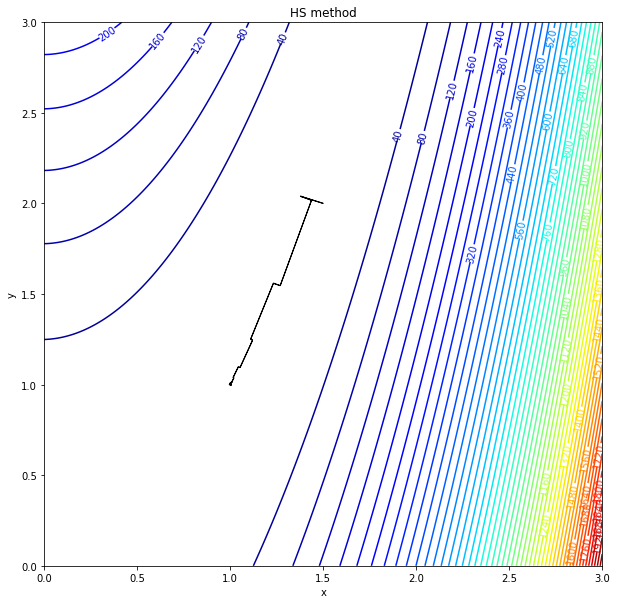

In [41]:
plot_path(path_HS,f,'HS method')

In [42]:
path_PR, i, x, y = nonlinearCG(x0, y0, f, Df, FR_beta, False)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')

After 95 iterations, approximate minimum is 3.868887471437351e-15 at (1.000000062171041, 1.00000012472414)


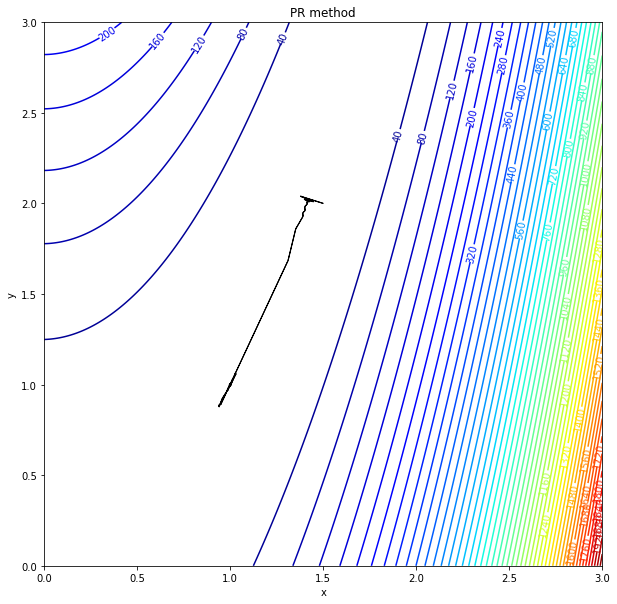

In [43]:
plot_path(path_PR,f,'PR method')

In [44]:
path_FR, i, x, y=nonlinearCG(x0, y0, f, Df, FR_beta, True)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')

After 499 iterations, approximate minimum is 1.270038654320125e-15 at (1.0000000349829514, 1.000000071325783)


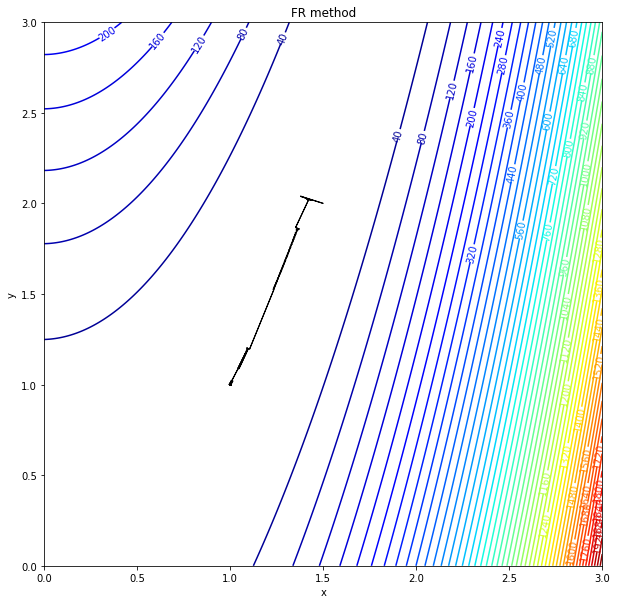

In [45]:
plot_path(path_FR,f,'FR method')

### More testing on each of the methods

In [46]:
a,b = 1,15    # parameters for Rosenbrock function
f = lambda x,y: (a-x)**2+b*(y-x**2)**2
Df = lambda x,y: np.array([2*(x-a)-4*b*x*(y-x**2),
                           2*b*(y-x**2)])

x0,y0 = 1.5,2    # initial point for all methods

path_HS, i_HS, x_HS, y_HS = nonlinearCG(x0, y0, f, Df, HS_beta, True)
path_HSf, i_HSf, x_HSf, y_HSf = nonlinearCG(x0, y0, f, Df, HS_beta, False)
path_PR, i_PR, x_PR, y_PR = nonlinearCG(x0, y0, f, Df, PR_beta, True)
path_PRf, i_PRf, x_PRf, y_PRf = nonlinearCG(x0, y0, f, Df, PR_beta, False)
path_PRP, i_PRP, x_PRP, y_PRP = nonlinearCG(x0, y0, f, Df, PR_betaPlus, True)
path_PRPf, i_PRPf, x_PRPf, y_PRPf = nonlinearCG(x0, y0, f, Df, PR_betaPlus, False)
path_FR, i_FR, x_FR, y_FR = nonlinearCG(x0, y0, f, Df, FR_beta, True)
path_FRf, i_FRf, x_FRf, y_FRf = nonlinearCG(x0, y0, f, Df, FR_beta, False)

print(f'After {i_HS} iterations, approximate minimum for HS with Restart is {f(x_HS,y_HS)} at {x_HS,y_HS}')
print(f'After {i_HSf} iterations, approximate minimum for HS without Restart is {f(x_HSf,y_HSf)} at {x_HSf,y_HSf}')
print(f'After {i_PR} iterations, approximate minimum for PR with Restart is {f(x_PR,y_PR)} at {x_PR,y_PR}')
print(f'After {i_PRf} iterations, approximate minimum for PR without Restart is {f(x_PRf,y_PRf)} at {x_PRf,y_PRf}')
print(f'After {i_PRP} iterations, approximate minimum for PR+ with Restart is {f(x_PRP,y_PRP)} at {x_PRP,y_PRP}')
print(f'After {i_PRPf} iterations, approximate minimum for PR+ without Restart is {f(x_PRPf,y_PRPf)} at {x_PRPf,y_PRPf}')
print(f'After {i_FR} iterations, approximate minimum for FR with Restart is {f(x_FR,y_FR)} at {x_FR,y_FR}')
print(f'After {i_FRf} iterations, approximate minimum for FR without Restart is {f(x_FRf,y_FRf)} at {x_FRf,y_FRf}')

After 58 iterations, approximate minimum for HS with Restart is 2.362166500501353e-17 at (1.000000000501324, 0.9999999997544404)
After 64 iterations, approximate minimum for HS without Restart is 4.0601549602736497e-16 at (1.0000000189988352, 1.0000000397308713)
After 4532 iterations, approximate minimum for PR with Restart is 3.560503828819476e-15 at (1.0000000587244953, 1.0000001201807516)
After 2068 iterations, approximate minimum for PR without Restart is 3.655776045958807e-15 at (0.9999999395595816, 0.9999998786924066)
After 4532 iterations, approximate minimum for PR+ with Restart is 3.560503828819476e-15 at (1.0000000587244953, 1.0000001201807516)
After 1688 iterations, approximate minimum for PR+ without Restart is 2.9691692294637172e-15 at (0.9999999455302795, 0.9999998906759603)
After 315 iterations, approximate minimum for FR with Restart is 1.7790712411994114e-16 at (1.00000001177281, 1.0000000251644279)
After 84 iterations, approximate minimum for FR without Restart is 1.8

### Sample Questions

1.) (from practice midterm)

Which of the following is true of conjugate gradient methods on non-quadratic functions ? 

A. "Restarting" (i.e setting $B_k = 0$) every few iterations can improve convergence.

B. They typically converge even faster than Newton's Method.

C. Convergence is guaranteed for any starting point, for any choice of step size.

D. They are guaranteed to converge in at most $n$ steps.



2.) Which of the following nonlinear conjugate gradient methods guarantees that $\mathbf{p}_k$ will be a descent direction?

* PR Formula

* PR+ Formula

* FR Formula


3.) If the Strong Wolfe conditions are satisfied, which nonlinear conjugate gradient methods guarantee descent?

* PR Formula

* PR+ Formula

* FR Formula

4.) What is an advantage of using Nonlinear Conjugate Gradient Methods on non-quadratic functions as opposed to something like Newton's Method?

A. They're guaranteed to converge in $n$ steps.

B. They don't require calculation or inversion of the Hessian.

C. They don't require calculation or inversion of the gradient.

D. (Some of the methods) guarantee global convergence with appropriate step size.